# The Weak Law of Large Numbers

> *CIS 2033, Spring 2017*

>  *April 10, 2017*

The Weak Law of Large Numbers is a rather simple result, but it plays a central role within probability theory. The setting is as follows. We start with some probability distribution that has a certain mean $\mu$ and variance $\sigma^2$, which we assume to be finite. We then draw independent random variables, $X_i$ out of this distribution so that these $X_i$s are independent and identically distributed, i.i.d. for short.

What's going on here is that we're carrying out a long experiment during which these random
variables are drawn. Once we have drawn $n$ of these random variables, we can calculate the average
of the values that have been obtained, and this gives us the so-called *sample mean*.

$$
\textbf{Sample Mean: } M_n = \frac{X_1 + X_2 + \ldots + X_n}{n}
$$

Notice that the sample mean is a random variable because it is a function of random variables. It should
be distinguished from the true mean, $\mu$, which is the expected value of the $X_i$'s, ${\rm E}[X_i]$, which is a number. The *true mean is not random* - it is the average over *all* the possible outcomes of the random variable $X_i$.

The sample mean is the simplest and most natural way of trying to estimate the true mean, and the
weak law of large numbers will provide some support to this notion. 

This week, we'll look at the properties of the sample mean. In particular, we calculate its expectation, ${\rm E}[M_i]$, and its variance, ${\rm var}(M_n)$. Here, we just note the following:

* The expectation ${\rm E}[M_i]$ involves two kinds of averaging: 
    1. The sample mean, $M_n$ is the average over the values observed during one long experiment. That is, it ivolves drawing the $n$ of the $X_i$s and calculating $\frac{X_1 + X_2 + \ldots + X_n}{n}$.
    2. The expectation, ${\rm E}[M_i]$, on the other hand, averages over all possible outcomes of this experiment.
    
Thus, this second average, ${\rm E}[M_i]$, is some kind of theoretical average because we do not
get to observe all the possible outcomes of the experiment, but the sample mean, $M_n$, is something that we do
actually calculate on the basis of our observations.

### Drawing Samples and Computing the Sample Average

We start by generating 5 observations from the *Uniform*$[0, 5]$ distribution and computing its average. (This average is $M_5$ in our notation.)

In [1]:
import numpy as np
from scipy.stats import uniform
%matplotlib inline
import matplotlib.pyplot as plt

u5 = uniform.rvs(0, 5, size=5);
print("Observations: ", u5); 
print("The Average of the Observations: ", np.mean(u5))

Observations:  [ 1.34336842  3.30339448  2.5819861   2.67806663  3.40341141]
The Average of the Observations:  2.66204540609


Try re-running this code a few times. You will see that you often get the average that is 'far away' from the true mean, which is 2.5.

So why is the true mean of $M_5$ equal to 2.5? Again, this follows from the linearity of expectations: 

\begin{align}
{\rm E}[M_5] &= {\rm E}\left[\frac{X_1 + X_2 + X_3 + X_4 + X_5}{5}\right] \\
 &= \frac{1}{5}{\rm E}[X_1 + X_2 + X_3 + X_4 + X_5] = \frac{5 \cdot 2.5}{5} = 2.5
\end{align}

Note that this derivation holds true for any finite number of samples we draw. In general, the following holds for any $n$:

$$
{\rm E}[M_n] = {\rm E}[X_i]
$$

We now increase the sample size and look at the average again. Will our sample average get any closer to the true mean of 2.5?


In [2]:
u1000 = uniform.rvs(0, 5, size=1000);
#print("Observations: ", u1000); 
print("The Average of the Observations: ", np.mean(u1000))

The Average of the Observations:  2.55888223015


Try re-running this code a few times. What do you notice? 

Are the averages now any closer to 2.5? 

The average of a large number of observations should be much closer to the true mean of 2.5.

## Plotting the Sample Averages for Different Sample Sizes



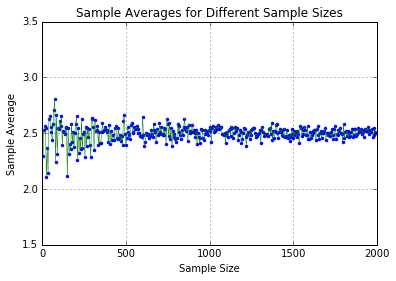

In [3]:
M_n = []                               # sample averages
sample_sizes = np.arange(5, 2000, 5)   # draw 5, 10, 15, 20, etc. observations at a time
for i in sample_sizes:
    sample = uniform.rvs(0, 5, size=i)
    M_n.append(np.mean(sample))

#print(M_n)

fig, ax = plt.subplots(1, 1);
plt.grid()
ax.plot(sample_sizes, M_n, 'b.', lw=1);
ax.plot(sample_sizes, M_n, 'g', lw=0.5);
ax.set_ylim(1.5, 3.5);
ax.set_title('Sample Averages for Different Sample Sizes');
ax.set_ylabel('Sample Average');
ax.set_xlabel('Sample Size');

The blue dots are the sample averages here. Notice they tend to cluster around 2.5 as the sample size increases. 

## A First Look at the Variability of the Sample Mean

We can also look at the variability of the sample averages. 

In the following example, for each sample size we conduct 7 independent trials, where at each trial we generate a sample of the given size and compute its average. We then plot the 7 sample averages and also plot the average of the 7 sample averages (the blue line), as we increase the sample size. 

The variablity of the sample mean decreases as the sample size increases.


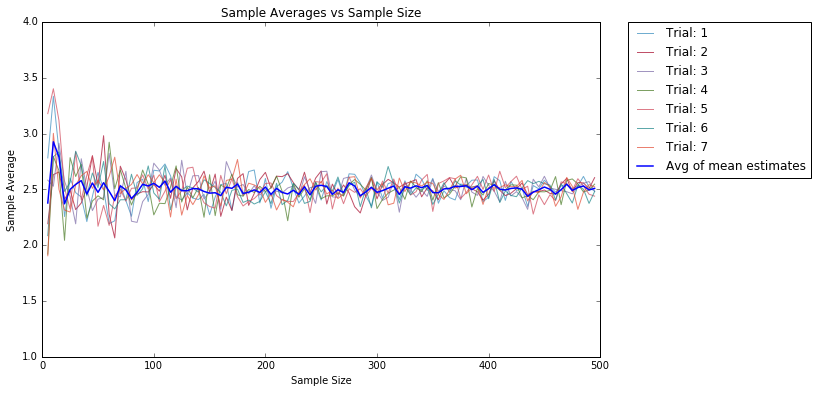

In [4]:
COLOR_PALETTE = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457", "#188487", "#E24A33"]

plt.figure(figsize=(10, 6))
trial_template = 'Trial: {}'.format
sample_sizes = np.arange(5, 500, 5)

M_ns = np.zeros([len(COLOR_PALETTE), len(sample_sizes)])
E_M_n = np.empty([len(sample_sizes)])

for ii in np.arange(len(COLOR_PALETTE)):
    #M_n = []  
    for i in sample_sizes:
        sample = uniform.rvs(0, 5, size=i)
        #M_n.append(np.mean(sample))
        M_ns[ii][np.int(i/5-1)] = np.mean(sample)
    #plt.plot(sample_sizes, M_n, lw=1, label=trial_template(ii + 1), c=COLOR_PALETTE[ii], alpha=0.7)
    plt.plot(sample_sizes, M_ns[ii], lw=1, linestyle = '-', label=trial_template(ii + 1), c=COLOR_PALETTE[ii], alpha=0.7)
E_M_n = np.mean(M_ns, axis=0)
plt.plot(sample_sizes, E_M_n, lw=1.5, c='b', label="Avg of mean estimates")


plt.title('Sample Averages vs Sample Size');
plt.ylabel('Sample Average');
plt.xlabel('Sample Size');
plt.ylim([1, 4]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);